In [13]:
# Plik excercise zawiera wynik y i dane wejściowe x1, x2 dla 40 punktów danych
# z dalszymi 20 punktami z danymi wejściowymi, ale bez wyniku.

In [14]:
import pandas as pd

#Load file
data = pd.read_csv("/home/ayane/AiBD_Lab6/Zad1/exercise.csv")

In [15]:
# Show data in *.csv file
print(data)

        y    x1     x2
0   15.68  6.87  14.09
1    6.18  4.40   4.35
2   18.10  0.43  18.09
3    9.07  2.73   8.65
4   17.97  3.25  17.68
5   10.04  5.30   8.53
6   20.74  7.08  19.50
7    9.76  9.73   0.72
8    8.23  4.51   6.88
9    6.52  6.40   1.26
10  15.69  5.72  14.62
11  15.51  6.28  14.18
12  20.61  6.14  19.68
13  19.58  8.26  17.75
14   9.72  9.41   2.44
15  16.36  2.88  16.10
16  18.30  5.74  17.37
17  13.26  0.45  13.25
18  12.10  3.74  11.51
19  18.15  5.03  17.44
20  16.80  9.67  13.74
21  16.55  3.62  16.15
22  18.79  2.54  18.62
23  15.68  9.15  12.74
24   4.08  0.69   4.02
25  15.45  7.97  13.24
26  13.44  2.49  13.21
27  20.86  9.81  18.41
28  16.05  7.56  14.16
29   6.00  0.98   5.92
30   3.29  0.65   3.22
31   9.41  9.00   2.74
32  10.76  7.83   7.39
33   5.98  0.26   5.97
34  19.23  3.64  18.89
35  15.67  9.28  12.63
36   7.04  5.66   4.18
37  21.63  9.71  19.32
38  17.84  9.36  15.19
39   7.49  0.88   7.43
40    NaN  9.87  10.43
41    NaN  9.99  15.72
42    NaN  

In [16]:
# Shows first 39 rows of data
for i in range (0, 40):
    print(data['y'][i], data['x1'][i], data['x2'][i])

15.68 6.87 14.09
6.18 4.4 4.35
18.1 0.43 18.09
9.07 2.73 8.65
17.97 3.25 17.68
10.04 5.3 8.53
20.74 7.08 19.5
9.76 9.73 0.72
8.23 4.51 6.88
6.52 6.4 1.26
15.69 5.72 14.62
15.51 6.28 14.18
20.61 6.14 19.68
19.58 8.26 17.75
9.72 9.41 2.44
16.36 2.88 16.1
18.3 5.74 17.37
13.26 0.45 13.25
12.1 3.74 11.51
18.15 5.03 17.44
16.8 9.67 13.74
16.55 3.62 16.15
18.79 2.54 18.62
15.68 9.15 12.74
4.08 0.69 4.02
15.45 7.97 13.24
13.44 2.49 13.21
20.86 9.81 18.41
16.05 7.56 14.16
6.0 0.98 5.92
3.29 0.65 3.22
9.41 9.0 2.74
10.76 7.83 7.39
5.98 0.26 5.97
19.23 3.64 18.89
15.67 9.28 12.63
7.04 5.66 4.18
21.63 9.71 19.32
17.84 9.36 15.19
7.49 0.88 7.43


In [17]:
df = pd.DataFrame(data,columns=['y','x1','x2'])

# Create table with data that is known
#print(df[:40]) #Prints first 40 rows
known_data = df[:40]
#print(known_data)

# Create table with data that we want to predict
#print(df[40:60]) #Prints rows with index 40, 41, ..., 58, 59
not_known_data = df[40:60]
#print(not_known_data)

In [18]:
import statsmodels.api as sm

#Build model based on known_data
X = known_data[['x1','x2']]
Y = known_data['y']
X = sm.add_constant(X) # Adds a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
    
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        18:43:42   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3151      0.388      3.392      0.0

/home/ayane/anaconda3/envs/anaconda_env_py3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [19]:
# Variables taken from model above
const_coef = 1.3151
x1_coef = 0.5148
x2_coef = 0.8069

# We know X1 and X2 and want to predict Y (based on model created from known_data)
X1 = not_known_data['x1']
X2 = not_known_data['x2']

for row in not_known_data:
    predicted_y = (const_coef) + (x1_coef)*X1 + (x2_coef)*X2

print(predicted_y)

40    14.812143
41    19.142420
42     5.916687
43    10.530219
44    19.012042
45    13.398546
46     4.829030
47     9.145561
48     5.892356
49    12.338338
50    18.908109
51    16.064268
52     8.962916
53    14.972426
54     5.859604
55     7.374722
56     4.535159
57    15.132925
58     9.100680
59    16.084528
dtype: float64


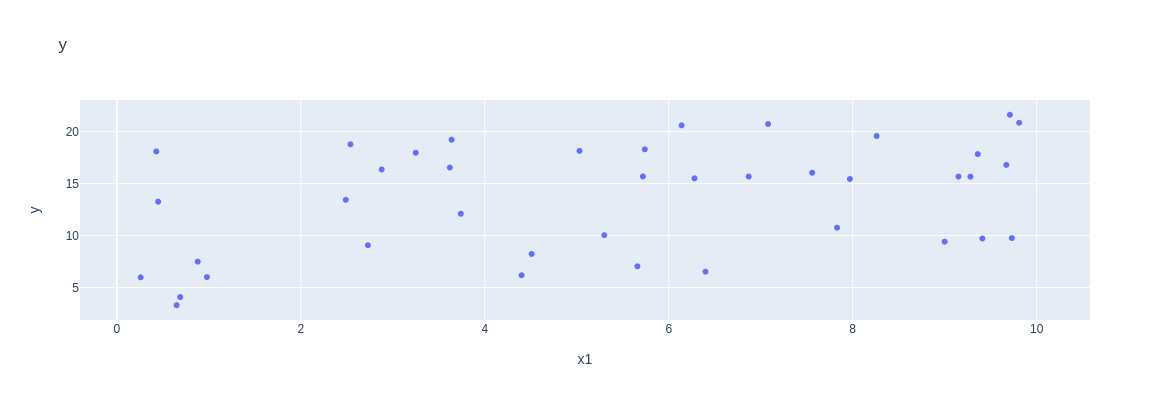

In [20]:
#PLOTLY EXPRESS
import plotly.express as px

fig = px.scatter(data, x="x1", y="y",height=400, title="y")
fig.show()

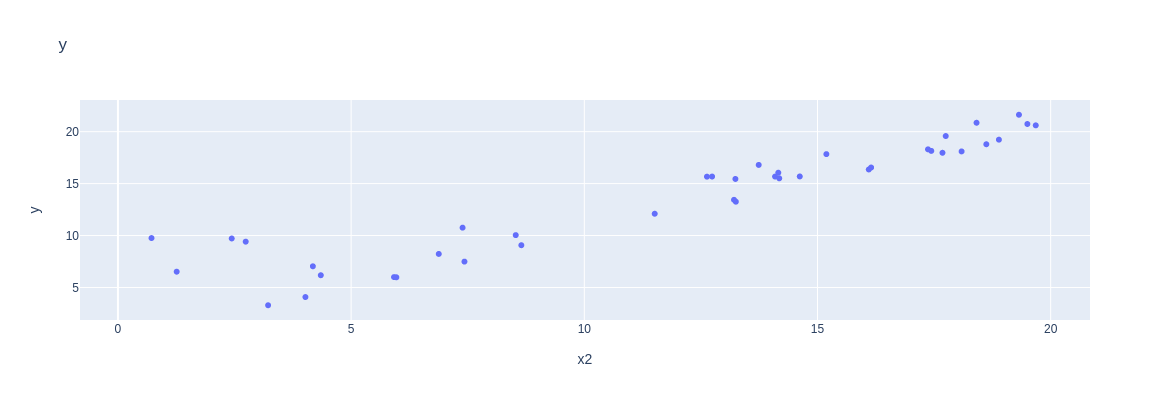

In [21]:
fig = px.scatter(data, x="x2", y="y",height=400, title="y")
fig.show()

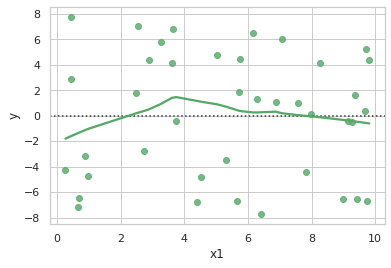

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Without this line plot appers in figure:
%matplotlib inline

sns.set(style="whitegrid")

#Plots the residuals after fitting a linear model
sns.residplot(known_data['x1'], known_data['y'], lowess=True, color="g")
plt.show()
#Model is ok
#Assumptions have been met
#Certainty of prediction: quite possible

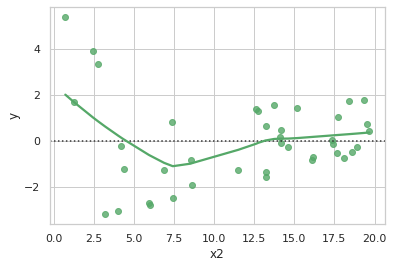

In [23]:
# Plot the residuals after fitting a linear model
sns.residplot(known_data['x2'], known_data['y'], lowess=True, color="g")
plt.show()
#Model is ok
#Assumptions have been met
#Certainty of prediction: quite possible